<font size="10"> Big Contest 2019 </font>

-------------------------------
<br />

# 전처리

모든 팀원이 쉽게 이해할 수 있는 코드를 작성하여 효율적인 프로젝트 진행을 목표로 합니다.
<br />
<br />
**변수 생성 기준**

- 예측 정확도 상승
- 편의

**객체(변수, 함수) 네이밍 규칙**

- 고유명사가 아닌 줄임말은 명확하도록 풀어 적는다. e.g.) STT -> sched_time
- 줄임말 기준: 
    - 줄임말을 썻을 때 이해하기 쉬운 경우
    - 기존 이름이 너무 장황
    - 일반적으로 많이 쓰는 줄임말을 사용. 
    - e.g.) count -> cnt, average -> avg, schedule -> sched 
- 동사를 앞에 적는다. 동사\_명사 e.g.) sum_flight, avg_flight, cnt_flight
- 자주 사용되는 단어일수록 앞에 위치 e.g.) sched_time, sched_datetime
- 더미변수(binary 변수)는 is_이름 e.g.) is_delay, is_holiday
- 생소하거나 어려운 단어라면 길더라도 그냥 쓰자.
- "."을 사용하지말고 "\_"로 통일하자. "."을 사용하게 되면 메소드와 혼돈을 일으킴.
- GPA와 같은 이름을 제외하면 소문자를 사용하자.
- 영어 이름을 사용하자.

**가독성**

- 주석을 달아주자.
- 다음은 선택사항입니다.
    - 코드 실행 단축을 위한 벡터화: 간단히 설명하자면 for루프, apply 대신 판다스, 사이킨런 내장함수를 사용하면 된다.
    - 반복된 코드로 스크립트가 길어지는 것을 방지하기 위해 함수화하자. 
    - 메모리를 위해 가끔식 객체 삭제가 필요할 수도 있다.
- 파이썬 스타일 가이드 PEP8을 지키자. 적어도 망치를 눌러주자.

<br />

<font size="4"> 모든 데이터셋에 대해서 다음과 같은 변수를 추가했습니다. </font>

- 날짜(date): yyyy-mm-dd
- 날짜시간(datetime): yyyy-mm-dd hh:mm:ss
- is_로 시작하는 binary 변수의 값은 True, False로 정하였습니다. 여러 연산을 수행할 때 훨씬 편하기 때문입니다. 
 e.g.) `sum(df_afsnt['is_delay'])`

EDA를 기준으로 작성하였으며 모델링용 데이터셋은 나중에 다시 작성하겠습니다.

In [2]:
import pandas as pd

df_afsnt = pd.read_csv("AFSNT.csv", encoding="CP949")
df_afsnt["STT"] = pd.to_datetime(df_afsnt["STT"], format = "%H:%M").dt.time
df_afsnt["ATT"] = pd.to_datetime(df_afsnt["ATT"], format = "%H:%M").dt.time

df_afsnt = df_afsnt.rename(columns={ 
    "SDT_YY": "year", "SDT_MM":"month", "SDT_DD":"day",  "SDT_DY":"wday", 
    "ARP":"origin", "ODP":"dest", 
    "FLO":"airline", "FLT":"flight" ,"REG":"tailnum", 
    "AOD":"is_arrive", 
    "IRR":"is_regular", 
    "STT":"sched_time", "ATT":"real_time", 
    "DLY":"is_delay", "DRR":"cause_delay", 
    "CNL":"is_cancel", "CNR":"cause_cancel"
})
df_afsnt["date"] = pd.to_datetime(df_afsnt[["year", "month", "day"]])
df_afsnt["sched_datetime"] = pd.to_datetime(df_afsnt['date'].astype(str) + " " + df_afsnt["sched_time"].astype(str))
df_afsnt["real_datetime"] = pd.to_datetime(df_afsnt['date'].astype(str) + " " + df_afsnt["real_time"].astype(str))
df_afsnt["is_arrive"] = np.where(df_afsnt["is_arrive"] == "A", "Y", "N")
df_afsnt[[col for col in df_afsnt if col.startswith('is_')]] = df_afsnt[[col for col in df_afsnt if col.startswith('is_')]].apply(lambda x: x == "Y") # is_가 많아졌을 때 효과적인 코딩임

# 공항 테이블
df_afsnt['origin'] = df_afsnt['origin'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})
df_afsnt['dest'] = df_afsnt['dest'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})

# 항공사 테이블 
df_afsnt['airline'] = df_afsnt['airline'].replace({
    'A': '아시아나', 
    'I': '진에어',
    'J': '대한항공', 
    'F': '이스타',
    'H': '제주항공', 
    'L': '티웨이',
    'B': '에어부산', 
    'M': '코리아익스프레스에어'
})

# delay 변수 생성
temp = df_afsnt["real_datetime"] - df_afsnt["sched_datetime"] 
temp = pd.DataFrame(temp.dt.components)
df_afsnt["delay"] = temp['minutes'] + 60 * temp['hours'] + 1440 * temp['days']
del temp

df_afsnt.head()
# df_afsnt.to_csv("df_afsnt.csv", index = False, encoding='CP949')

,year,month,day,wday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
0,2017,1,1,일,제주,청주,대한항공,J1955,SEw3NzE4,False,...,10:05:00,10:32:00,False,NaN,False,NaN,2017-01-01,2017-01-01 10:05:00,2017-01-01 10:32:00,27
1,2017,1,1,일,제주,청주,대한항공,J1954,SEw3NzE4,True,...,09:30:00,09:31:00,False,NaN,False,NaN,2017-01-01,2017-01-01 09:30:00,2017-01-01 09:31:00,1
2,2017,1,1,일,제주,청주,대한항공,J1956,SEw3NzE4,True,...,12:45:00,13:03:00,False,NaN,False,NaN,2017-01-01,2017-01-01 12:45:00,2017-01-01 13:03:00,18
3,2017,1,1,일,제주,청주,대한항공,J1957,SEw3NzE4,False,...,13:25:00,14:09:00,True,C02,False,NaN,2017-01-01,2017-01-01 13:25:00,2017-01-01 14:09:00,44
4,2017,1,1,일,제주,청주,대한항공,J1958,SEw3NzE4,True,...,16:10:00,16:31:00,False,NaN,False,NaN,2017-01-01,2017-01-01 16:10:00,2017-01-01 16:31:00,21


 T는 훈련비행 M은 항공기 시험비행(실제 운항 전 성능테스트), F는 회항 및 대체편 구분으로 많이 사용
 
 나머지 항공편에 대해서는 등록기호가 모두 설명할 수 있다는 가정.

In [23]:
df_afsnt['flight'].value_counts()

L1804     1832
L1807     1828
L1805     1828
L1808     1828
J1534     1826
L1806     1826
J1911     1824
A1736     1824
A1129     1822
J1960     1822
L1906     1822
H1513     1822
A1704     1822
A1143     1822
I1554     1822
B1206     1822
H1516     1822
J1959     1822
H1124     1822
B1010     1822
J1637     1822
J1910     1822
A1233     1822
I1557     1822
J1335     1822
B1207     1822
L1905     1822
F1901     1822
J1635     1822
A1707     1822
          ... 
F1504F       1
H1591        1
I1939F       1
J1149F       1
F1152F       1
I1937F       1
A1511        1
J1493        1
B1041        1
H1991F       1
A1373A       1
H1596        1
A1336A       1
L1005        1
H1490        1
F1611F       1
I1954        1
I1938        1
B1734        1
A1858B       1
F1284B       1
F1704A       1
F1265F       1
J1478        1
H1965F       1
H1594        1
I1953        1
A1459        1
A1861A       1
F1691B       1
Name: flight, Length: 1536, dtype: int64

is_goldentime
- 연속 3이 이상의 연휴 
- 추석/설 연휴일 때는 연휴 +-1일도 연휴라고 가정: 전날 밤이나 마지막날 다음날 새벽 일찍 출근할수도 있다.

In [3]:
df_afsnt['is_flight_T'] = np.where(df_afsnt['flight'].str.endswith("T"), 1, 0)
df_afsnt['is_flight_M'] = np.where(df_afsnt['flight'].str.endswith("M"), 1, 0)
df_afsnt['is_flight_F'] = np.where(df_afsnt['flight'].str.endswith("F"), 1, 0)
df_afsnt['is_holiday'] = df_afsnt['date'].isin(["2017-01-01", "2017-01-27", "2017-01-28", "2017-01-29", "2017-01-30", "2017-03-01", "2017-05-03", "2017-05-05", "2017-05-09", "2017-06-06", "2017-08-15",
 "2017-09-30", "2017-10-01", "2017-10-02", "2017-10-03", "2017-10-04", "2017-10-05", "2017-10-06", "2017-10-07", "2017-10-08", "2017-10-09",  "2017-12-23",  "2017-12-24", "2017-12-25", "2018-01-01", "2018-02-15", "2018-02-16", "2018-02-17", "2018-02-18", "2018-03-01",
 "2018-05-05", "2018-05-07", "2018-05-22",
 "2018-06-06", "2018-06-13", "2018-08-15", "2018-09-22", "2018-09-23", "2018-09-24", "2018-09-25", "2018-09-26", 
 "2018-10-03", "2018-10-09", "2018-12-25", 
 "2019-01-01", "2019-02-02", "2019-02-03", "2019-02-04", "2019-02-05", "2019-02-06",
 "2019-03-01", "2019-05-05", "2019-05-06", 
 "2019-05-12", "2019-06-06"])

df_afsnt['is_goldentime'] = df_afsnt['date'].isin(["2017-01-26", "2017-01-27", "2017-01-28", "2017-01-29", "2017-01-30", "2017-01-31", "2017-05-05", "2017-05-06", "2017-05-07", "2017-08-15",
 "2017-09-29", "2017-09-30", "2017-10-01", "2017-10-02", "2017-10-03", "2017-10-04", "2017-10-05", "2017-10-06", "2017-10-07", "2017-10-08", "2017-10-09", "2017-10-10", 
                                                   "2017-12-25", "2018-01-01", "2018-02-14", "2018-02-15", "2018-02-16", "2018-02-17", "2018-02-18", "2018-02-19", "2018-03-01",
 "2018-05-05", "2018-05-07", "2018-05-22",
 "2018-06-06", "2018-06-13", "2018-08-15", "2018-09-21", "2018-09-22", "2018-09-23", "2018-09-24", "2018-09-25", "2018-09-26", "2018-09-27", 
 "2018-10-03", "2018-10-09", "2018-12-25", 
 "2019-01-01", "2019-02-01", "2019-02-02", "2019-02-03", "2019-02-04", "2019-02-05", "2019-02-06", "2019-02-07",
 "2019-03-01", "2019-05-04", "2019-05-05", "2019-05-06"])



In [24]:
df_test['is_holiday'] = df_afsnt['date'].isin(["2019-09-15"])
df_test['is_goldentime'] = df_afsnt['date'].isin(["2019-09-15", "2019-09-16"])

141100.0

In [13]:
import pandas as pd

# df_afsnt = pd.read_csv("df_afsnt.csv", encoding = "cp949")
temp1 = df_afsnt.groupby(["origin_dest", "is_weekend"]).agg({"is_delay": ["mean", "sum"]}).reset_index()
temp2 = df_afsnt.groupby(["origin_dest", "is_weekend"]).agg({"is_cancel": ["mean", "sum"]}).reset_index()

temp = pd.merge(temp1, temp2)
temp.to_csv("주말공항지연비율.csv", index = False, encoding = "cp949")

KeyError: 'origin_dest'

## 시간변수

<br />
<br />

**year feature** 
- 사드: 제주도  
- 일본: 제주도
- 기상악화: 태풍, 폭우 기타 등등

<br />

**month feature**
- month_sin: $sin(\frac{2\pi \ \times \ month}{12})$ month_cos: $cos(\frac{2\pi \ \times \ month}{12})$ 
- 성수기 
- 기타 

**day feature**

- is_weekend: 주말
- is_holiday: 공휴일
- is_goldtime: 황금연휴 (3일 또는 4일 이상 연속적으로 공휴일)
- goldtime_distance: 황금연휴로부터 얼마나 떨어졌는지(19년 9월15일까지가 추석연휴임) 

**hour, minute feature**
- time_sin: $60 sin(\frac{2\pi \ \times \ hour}{24}) + sin(\frac{2\pi \ \times \ minute}{60})$ time_cos: $60 cos(\frac{2\pi \ \times \ hour}{24}) + cos(\frac{2\pi \ \times \ minute}{60})$ 
- is_morning, is_launch, is_dinner: 나누는 기준?

In [4]:
import datetime as dt

df_afsnt['sched_datetime'] = pd.to_datetime(df_afsnt['sched_datetime'])

# 월
df_afsnt['month_sin'] = np.sin(2*df_afsnt['sched_datetime'].dt.month*np.pi / 12 )
df_afsnt['month_cos'] = np.cos(2*df_afsnt['sched_datetime'].dt.month*np.pi / 12 )

# 요일
df_afsnt['sched_datetime'] = pd.to_datetime(df_afsnt['sched_datetime'])
df_afsnt['is_weekend'] = np.where((df_afsnt['sched_datetime'].dt.weekday == 6) | (df_afsnt['sched_datetime'].dt.weekday == 5), True, False)

# 시간
df_afsnt['time_sin'] = 60 * np.sin(2*np.pi*df_afsnt['sched_datetime'].dt.hour / 24) + \
                        np.sin(2*df_afsnt['sched_datetime'].dt.minute*np.pi / 60)
df_afsnt['time_cos'] = 60 * np.cos(2*df_afsnt['sched_datetime'].dt.hour*np.pi / 24) + \
                        np.cos(2*np.pi*df_afsnt['sched_datetime'].dt.minute / 60)

## 공공데이터 

### 노선별 소요시간 및 거리 정보 + 해발고도



In [227]:
df_flight_airtime = pd.read_csv("df_flight_airtime.csv")[:43]

# 변수 이름 변경
df_flight_airtime = df_flight_airtime.rename(columns = {
                                    'ARP': 'origin', 
                                    'ODP': 'dest', 
                                    'KM': 'distance',
                                    'TIME': 'time'}
                                    )

# 변수 값 변경
df_flight_airtime['cityKor'] = \
    df_flight_airtime['cityKor'].replace({
    '서울/김포': '김포',
    '부산/김해': '김해',
    '횡성/원주': '원주'
})

df_flight_airtime['origin'] = \
    df_flight_airtime['origin'].replace({
    'CJJ': '청주',
    'CJU': '제주',
    'GMP': '김포',
    'HIN': '사천',
    'ICN': '인천',
    'KPO': '포항',
    'KUV': '군산',
    'KWJ': '광주',
    'MWX': '무안',
    'PUS': '부산',
    'RSU': '여수',
    'TAE': '대구',
    'USN': '울산',
    'WJU': '원주',
    'YNY': '양양'
})
df_flight_airtime['dest'] = \
    df_flight_airtime['dest'].replace({
    'CJJ': '청주',
    'CJU': '제주',
    'GMP': '김포',
    'HIN': '사천',
    'ICN': '인천',
    'KPO': '포항',
    'KUV': '군산',
    'KWJ': '광주',
    'MWX': '무안',
    'PUS': '부산',
    'RSU': '여수',
    'TAE': '대구',
    'USN': '울산',
    'WJU': '원주',
    'YNY': '양양'
})
# 불필요 변수 제거
df_flight_airtime.drop(['cityCode', 'cityEng', 'cityKor'], axis = 1, inplace = True)

# foreign key 생성
df_flight_airtime['origin_dest'] = df_flight_airtime['origin'] + '_' + df_flight_airtime['dest']
df_flight_airtime.drop(['origin', 'dest'], axis = 1, inplace = True)

df_afsnt['origin_dest'] = df_afsnt['origin'] + '_' + df_afsnt['dest']

# # df_afsnt에 df_flight_airtime을 Left_join
df_afsnt = pd.merge(df_afsnt, df_flight_airtime, how = "left")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 2: invalid start byte

In [63]:
df_flight_airtime.to_csv("df_flight_airtime.csv", index= False, encoding = "cp949")

In [69]:
pd.DataFrame(df_afsnt['origin_dest'].value_counts()).to_csv("공항노선들.csv", encoding = "cp949")

In [ ]:
# 해발 고도 
df_altitude = pd.DataFrame(pd.Series({
    '김포': 18,
    '김해': 4,
    '제주': 36,
    '대구': 35.4,
    '울산': 12.9,
    '청주': 58,
    '양양': 73.5,
    '무안': 23.7,
    '광주': 12.8,
    '여수': 20,
    '사천': 7.6,
    '포항': 21.3,
    '군산': 8.8,
    '원주': 100,
    '인천': 7
})).reset_index().rename(columns = {'index': 'airport', 0: 'alt'})

df_afsnt = pd.merge(df_afsnt, df_altitude, how = "left", left_on = 'origin', right_on = 'airport', suffixes = ('_origin', '_dest'))
df_afsnt = pd.merge(df_afsnt, df_altitude, how = "left", left_on = 'dest', right_on = 'airport', suffixes = ('_origin', '_dest'))
df_afsnt.drop(['airport_origin', 'airport_dest'], axis = 1, inplace = True)

In [ ]:
# 결측치 대치 
# df_afsnt["distance"] = np.where(df_afsnt["distance"].isnull(), 0, df_afsnt["distance"])
# 불필요 항공사 제거
df_afsnt = df_afsnt[(df_afsnt["airline"] != "C") & (df_afsnt["airline"] != "D") & (df_afsnt["airline"] != "K") & (df_afsnt["airline"] != "G") & \
         (df_afsnt["airline"] != "E")]

### 부지, 활주로, 터미널 정보

인천공항의 정보를 찾아야한다.
현재 인청공항의 연간처리능력을 찾지 못한 상태여서 매핑은 보류

In [16]:
df_airstrip = pd.read_csv("공공데이터\공항별부지및활주로정보.csv", encoding = 'cp949')
pd.merge(df_afsnt, df_airstrip, how = "left", left_on = "origin", right_on = "공항명")
# df_afsnt = pd.merge(df_afsnt, df_airstrip, how = "left", left_on = "origin", right_on = "공항명", suffixes = ('_origin', '_dest'))
# df_afsnt = pd.merge(df_afsnt, df_airstrip, how = "left", left_on = "dest", right_on = "공항명", suffixes = ('_origin', '_dest'))
# df_afsnt

,year,month,day,wday,origin,dest,airline,flight,tailnum,is_arrive,...,origin_dest,distance,time,alt_origin,alt_dest,공항명,lot_area,main_airstrip_standard,sub_airstrip_standard,processing_capacity
0,2017,1,1,일,제주,청주,대한항공,J1955,SEw3NzE4,False,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,일,제주,청주,대한항공,J1954,SEw3NzE4,True,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,일,제주,청주,대한항공,J1956,SEw3NzE4,True,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,일,제주,청주,대한항공,J1957,SEw3NzE4,False,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,일,제주,청주,대한항공,J1958,SEw3NzE4,True,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
5,2017,1,1,일,제주,청주,대한항공,J1959,SEw3NTk5,False,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
6,2017,1,1,일,제주,청주,대한항공,J1960,SEw3NTk5,True,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
7,2017,1,1,일,제주,청주,대한항공,J1961,SEw3NTk5,False,...,제주_청주,367.0,42.0,36.0,58.0,NaN,NaN,NaN,NaN,NaN
8,2017,1,1,일,김해,제주,대한항공,J1015,SEw3NzA2,True,...,김해_제주,NaN,NaN,4.0,36.0,NaN,NaN,NaN,NaN,NaN
9,2017,1,1,일,김포,제주,대한항공,J1242,SEw3NzA2,False,...,김포_제주,449.0,48.0,18.0,36.0,NaN,NaN,NaN,NaN,NaN


### 공항별여객및화물터미널정보

인천공항의 17년, 18년, 19년 여객터미널 면적(㎡), 여객터미널 수용능력(만명/년), 여객터미널, 화물터미널 면적(㎡), 화물터미널 처리능력찾기.

### 공항별체크인카운터운영현황정보

인천공항의 카운터, 컨베이어벨트, 발권데스크, 키오스크 찾아야하고 19년 데이터는 항공사를 찾아야하는데.. 보류

## 항공사 데이터

1. 공공데이터는 대부분이 공항에 대한 정보였기 때문에 구글에서 항공사 데이터를 추가하자.
<br />
<br />
2. feature engineering

    - mean encoding: [mean encoding의 필요성](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0)



## 삭제할 row

1. 결항데이터
2. 이상한 데이터 

In [ ]:
# 결항데이터 제거
df_afsnt = df_afsnt.loc[df_afsnt['is_cancel'] == False]

In [7]:
temp = df_afsnt[['year', 'month', 'day', 'origin', 'dest', 'flight', 'sched_time']]
df_afsnt.loc[temp[temp.duplicated(keep = False)].index, ['year', 'month', 'day', 'wday', 'sched_time', 'real_time', \
                                              'origin', 'dest', 'flight', 'tailnum', 'is_arrive', 'is_delay', 'is_cancel']]

,year,month,day,wday,sched_time,real_time,origin,dest,flight,tailnum,is_arrive,is_delay,is_cancel
605190,2018,2,5,월,20:30:00,22:23:00,제주,김포,A1982,SEw3NTA2,False,True,False
605191,2018,2,5,월,20:30:00,00:00:00,제주,김포,A1982,NaN,False,False,True
761425,2018,1,12,금,22:15:00,01:48:00,김포,제주,L1718,SEw4MjM3,True,False,False
761442,2018,1,12,금,22:15:00,00:00:00,김포,제주,L1718,NaN,True,False,True
763603,2018,2,5,월,21:55:00,23:17:00,대구,제주,L1808,SEw4MDg2,True,True,False
763626,2018,2,5,월,21:55:00,00:08:00,대구,제주,L1808,SEw4MDY5,True,False,False
781563,2018,8,24,금,07:30:00,07:28:00,제주,김포,L1701,SEw4MDI0,True,False,False
781583,2018,8,24,금,07:30:00,07:44:00,제주,김포,L1701,SEw4MjM3,True,False,False


In [ ]:
weird_idx = df_afsnt.loc[temp[temp.duplicated(keep = False)].index, ['year', 'month', 'day', 'wday', 'sched_time', 'real_time', \
                                              'origin', 'dest', 'flight', 'tailnum', 'is_arrive', 'is_delay', 'is_cancel']].index

Test set에 같은 문제가 있다면 삭제하지 않겠다.

In [148]:
df_test = pd.read_csv("df_test.csv", encoding = "cp949")

temp = df_test[['year', 'month', 'day', 'origin', 'dest', 'flight', 'sched_time']]
df_test.loc[temp[temp.duplicated(keep = False)].index, ['year', 'month', 'day', 'wday', 'sched_time', 'real_time', \
                                              'origin', 'dest', 'flight', 'tailnum', 'is_arrive', 'is_delay', 'is_cancel']]

,year,month,day,wday,sched_time,real_time,origin,dest,flight,tailnum,is_arrive,is_delay,is_cancel


Test set에 같은 문제가 없기 때문에 삭제하엿다.

In [ ]:
# 이상한 데이터 제거
df_afsnt.drop(weird_idx, inplace = True)

In [ ]:
df_afsnt.to_csv("df_afsnt.csv", encoding = "utf8", index = False)

In [ ]:
df_afsnt['is_holiday'] = np.where(df_afsnt['date'] == '20170101', True, 
                                  df_afsnt['date'] == )

In [ ]:
df_

## Test Set

In [129]:
df_test = pd.read_csv("AFSNT_DLY.csv", encoding="CP949")
df_test["STT"] = pd.to_datetime(df_test["STT"], format = "%H:%M").dt.time

df_test = df_test.rename(columns={ 
    "SDT_YY": "year", "SDT_MM":"month", "SDT_DD":"day",  "SDT_DY":"wday", 
    "ARP":"origin", "ODP":"dest", 
    "FLO":"airline", "FLT":"flight" ,"REG":"tailnum", 
    "AOD":"is_arrive", 
    "IRR":"is_regular", 
    "STT":"sched_time", 
    "DLY":"is_delay", "DLY_RATE":"prob_delay"
})

df_test['origin'] = df_test['origin'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})
df_test['dest'] = df_test['dest'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})


# # 항공사 테이블 
df_test['airline'] = df_test['airline'].replace({
    'A': '아시아나', 
    'I': '진에어',
    'J': '대한항공', 
    'F': '이스타',
    'H': '제주항공', 
    'L': '티웨이',
    'B': '에어부산', 
    'M': '코리아익스프레스에어'
})
df_test["date"] = pd.to_datetime(df_test[["year", "month", "day"]])
df_test["sched_datetime"] = pd.to_datetime(df_test['date'].astype(str) + " " + df_test["sched_time"].astype(str))

df_test.head()
# df_test.to_csv("df_test.csv", index = False, encoding='CP949')

,year,month,day,wday,origin,dest,airline,flight,is_arrive,sched_time,is_delay,prob_delay,date,sched_datetime
0,2019,9,16,월,김포,제주,티웨이,L1702,A,09:05:00,NaN,NaN,2019-09-16,2019-09-16 09:05:00
1,2019,9,16,월,제주,김포,티웨이,L1702,D,07:55:00,NaN,NaN,2019-09-16,2019-09-16 07:55:00
2,2019,9,16,월,`,제주,티웨이,L1720,A,14:40:00,NaN,NaN,2019-09-16,2019-09-16 14:40:00
3,2019,9,16,월,제주,김포,티웨이,L1720,D,13:30:00,NaN,NaN,2019-09-16,2019-09-16 13:30:00
4,2019,9,16,월,대구,제주,티웨이,L1808,A,20:10:00,NaN,NaN,2019-09-16,2019-09-16 20:10:00


In [22]:
df_test['origin_dest'] = df_test['origin'] + '_' + df_test['dest']
# df_afsnt에 Left_join
df_test = pd.merge(df_test, df_flight_airtime, how = "left")

NameError: name 'df_test' is not defined

In [ ]:
df_test = pd.merge(df_test, df_altitude, how = "left", left_on = 'origin', right_on = 'airport', suffixes = ('_origin', '_dest'))
df_test = pd.merge(df_test, df_altitude, how = "left", left_on = 'dest', right_on = 'airport', suffixes = ('_origin', '_dest'))
df_test.drop(['airport_origin', 'airport_dest'], axis = 1, inplace = True)

## SFSNT.csv

In [9]:
df_sched = pd.read_csv("SFSNT.csv", dtype={"FSD":str, "FED":str}, encoding="CP949")
df_sched = df_sched.drop("SSC", 1)
# print(df_sched.apply(lambda x: np.sum(pd.isnull(x)))) # 결측치 존재 
df_sched.loc[:, ["STA", "STD"]] = df_sched[["STA", "STD"]].fillna("00:00")
df_sched["STA"] = pd.to_datetime(df_sched["STA"], format = "%H:%M").dt.time.astype(str) # 맨앞에 0을 만들기 위해
df_sched["STD"] = pd.to_datetime(df_sched["STD"], format = "%H:%M").dt.time.astype(str)

df_sched = df_sched.rename(columns={ 
    "ORG":"origin", "DES":"dest", 
    "FLO":"airline", "FLT":"flight",  
    "STD":"dep_time", "STA":"arr_time",  # dep: depart, arr: arrive 
    "FSD":"start_date", "FED":"end_date", 
    "IRR":"is_regular" 
})



df_sched["start_date"] = df_sched['start_date'].str[:4] + "-" + df_sched['start_date'].str[4:6] + "-" + df_sched['start_date'].str[6:]
df_sched["end_date"] = df_sched['end_date'].str[:4] + "-" + df_sched['end_date'].str[4:6] + "-" + df_sched['end_date'].str[6:]
df_sched["start_dep_datetime"] = pd.to_datetime(df_sched["start_date"].astype(str) + " " + df_sched["dep_time"].astype(str))
df_sched["start_arr_datetime"] = pd.to_datetime(df_sched["start_date"].astype(str) + " " + df_sched["arr_time"].astype(str))
df_sched["end_dep_datetime"] = pd.to_datetime(df_sched["end_date"].astype(str) + " " + df_sched["dep_time"].astype(str))
df_sched["end_arr_datetime"] = pd.to_datetime(df_sched["end_date"].astype(str) + " " + df_sched["arr_time"].astype(str))

# 공항 테이블
df_sched['origin'] = df_sched['origin'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})
df_sched['dest'] = df_sched['dest'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})


# # 항공사 테이블 
df_sched['airline'] = df_sched['airline'].replace({
    'A': '아시아나', 
    'I': '진에어',
    'J': '대한항공', 
    'F': '이스타',
    'H': '제주항공', 
    'L': '티웨이',
    'B': '에어부산', 
    'M': '코리아익스프레스에어'
})
df_sched.head()
# df_sched.to_csv("df_sched.csv", index = False, encoding='CP949')

In [31]:
df_sched['origin_dest'] = df_sched['origin'] + '_' + df_sched['dest']
# df_afsnt에 Left_join
df_sched = pd.merge(df_sched, df_flight_airtime, how = "left")

In [53]:
df_sched = pd.merge(df_sched, df_altitude, how = "left", left_on = 'origin', right_on = 'airport', suffixes = ('_origin', '_dest'))
df_sched = pd.merge(df_sched, df_altitude, how = "left", left_on = 'dest', right_on = 'airport', suffixes = ('_origin', '_dest'))
df_sched.drop(['airport_origin', 'airport_dest'], axis = 1, inplace = True)

# SMOTE

기존에 존재하지 않는 데이터셋을 만들어내서 클래스 불균형 문제를 해결하는 방법.

훈련셋과 테스트셋의 기간 차이가 77일이나 나기 때문에 개인적으로는 회의적이다.

시간 데이터라서 평가가 힘들어서 제외

# 모델링

## Join other DataSets

지금까지 만든 변수들을 join하기 위해서는 key가 있어야한다. 우선, Test set에 있는 변수 10개가 key가 될 수 있는지 확인하였다.

In [115]:
temp = df_afsnt[['year', 'month', 'day', 'wday', 'origin', 'dest', 'flight', 'tailnum','is_arrive', 'sched_time']]
temp[temp.duplicated()]

,year,month,day,wday,origin,dest,flight,tailnum,is_arrive,sched_time


key가 됨을 확인하였고 최소한의 key 변수들을 찾는다.

In [163]:
temp = df_afsnt[['year', 'month', 'day', 'origin', 'dest', 'flight', 'tailnum','is_arrive', 'sched_time']]
temp[temp.duplicated(keep = False)]

,year,month,day,origin,dest,flight,tailnum,is_arrive,sched_time


Train set의 key: 'year', 'month', 'day', 'origin', 'dest', 'flight', 'tailnum','is_arrive', 'sched_time'

In [162]:
temp = df_test[['year', 'month', 'day', 'origin', 'dest', 'flight','is_arrive', 'sched_time']]
temp[temp.duplicated()]

,year,month,day,origin,dest,flight,is_arrive,sched_time


Test set의 key: 'year', 'month', 'day', 'origin', 'dest', 'flight','is_arrive', 'sched_time'

In [73]:
df_현준세훈 = pd.read_csv("afsnt_현준세훈.csv", encoding = "cp949")

In [1]:
import pandas as pd
import datetime as dt

df_현준세훈 = pd.read_csv("afsnt_현준세훈.csv", encoding="CP949")

# 공항 테이블
df_현준세훈['origin'] = df_현준세훈['origin'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})
df_현준세훈['dest'] = df_현준세훈['dest'].replace({
    'ARP1': '김포',
    'ARP2': '김해',
    'ARP3': '제주',
    'ARP4': '대구',
    'ARP5': '울산',
    'ARP6': '청주',
    'ARP7': '무안',
    'ARP8': '광주',
    'ARP9': '여수',
    'ARP10': '양양',
    'ARP11': '포항',
    'ARP12': '사천',
    'ARP13': '군산',
    'ARP14': '원주',
    'ARP15': '인천',    
})

# 항공사 테이블 
df_현준세훈['airline'] = df_현준세훈['airline'].replace({
    'A': '아시아나', 
    'I': '진에어',
    'J': '대한항공', 
    'F': '이스타',
    'H': '제주항공', 
    'L': '티웨이',
    'B': '에어부산', 
    'M': '코리아익스프레스에어'
})

# delay 변수 생성
df_현준세훈["is_arrive"] = np.where(df_현준세훈["is_arrive"] == "A", True, False)
df_현준세훈["sched_time"] = pd.to_datetime(df_현준세훈["sched_time"].astype(str))
df_현준세훈['sched_time'] = df_현준세훈['sched_time'].dt.time

# df_현준세훈.to_csv("df_현준세훈.csv", index = False, encoding='CP949')


In [213]:
df_현준세훈 = df_현준세훈[['year', 'month', 'day', 'origin', 'dest', 'flight', 'tailnum','is_arrive', 'sched_time', 'congestion']]

In [216]:
df_현준세훈

,year,month,day,origin,dest,flight,tailnum,is_arrive,sched_time,congestion
0,2017,1,1,김포,제주,A1901,SEw3Nzc2,False,06:10:00,8
1,2017,1,1,김포,제주,A1905,SEw4MjM2,False,06:15:00,10
2,2017,1,1,김포,제주,L1751,SEw4MjM3,False,06:20:00,10
3,2017,1,1,김포,제주,F1201,SEw4MjA3,False,06:25:00,10
4,2017,1,1,김포,제주,H1101,SEw4MDMx,False,06:30:00,13
5,2017,1,1,김포,제주,I1301,SEw3NTYz,False,06:30:00,13
6,2017,1,1,김포,제주,A1907,SEw3NTk0,False,06:40:00,14
7,2017,1,1,김포,제주,I1303,SEw4MDE1,False,06:40:00,14
8,2017,1,1,김포,제주,J1204,SEw3Nzg1,False,06:45:00,13
9,2017,1,1,김포,제주,A1903,SEw3Nzcz,False,06:45:00,13


In [221]:
df_afsnt = pd.read_csv("df_afsnt.csv")
df_afsnt

,year,month,day,wday,origin,dest,airline,flight,tailnum,is_arrive,...,month_sin,month_cos,is_weekend,time_sin,time_cos,origin_dest,distance,time,alt_origin,alt_dest
0,2017,1,1,일,제주,청주,대한항공,J1955,SEw3NzE4,False,...,5.000000e-01,0.866025,True,3.050000e+01,-51.095499,제주_청주,367.0,42.0,36.0,58.0
1,2017,1,1,일,제주,청주,대한항공,J1954,SEw3NzE4,True,...,5.000000e-01,0.866025,True,4.242641e+01,-43.426407,제주_청주,367.0,42.0,36.0,58.0
2,2017,1,1,일,제주,청주,대한항공,J1956,SEw3NzE4,True,...,5.000000e-01,0.866025,True,-1.000000e+00,-60.000000,제주_청주,367.0,42.0,36.0,58.0
3,2017,1,1,일,제주,청주,대한항공,J1957,SEw3NzE4,False,...,5.000000e-01,0.866025,True,-1.502914e+01,-58.821575,제주_청주,367.0,42.0,36.0,58.0
4,2017,1,1,일,제주,청주,대한항공,J1958,SEw3NzE4,True,...,5.000000e-01,0.866025,True,-5.109550e+01,-29.500000,제주_청주,367.0,42.0,36.0,58.0
5,2017,1,1,일,제주,청주,대한항공,J1959,SEw3NTk5,False,...,5.000000e-01,0.866025,True,-5.296152e+01,-30.000000,제주_청주,367.0,42.0,36.0,58.0
6,2017,1,1,일,제주,청주,대한항공,J1960,SEw3NTk5,True,...,5.000000e-01,0.866025,True,-5.795555e+01,14.529143,제주_청주,367.0,42.0,36.0,58.0
7,2017,1,1,일,제주,청주,대한항공,J1961,SEw3NTk5,False,...,5.000000e-01,0.866025,True,-5.246152e+01,29.133975,제주_청주,367.0,42.0,36.0,58.0
8,2017,1,1,일,김해,제주,대한항공,J1015,SEw3NzA2,True,...,5.000000e-01,0.866025,True,-5.745555e+01,-14.663117,김해_제주,0.0,NaN,4.0,36.0
9,2017,1,1,일,김포,제주,대한항공,J1242,SEw3NzA2,False,...,5.000000e-01,0.866025,True,-5.146152e+01,29.133975,김포_제주,449.0,48.0,18.0,36.0


In [219]:
df_afsnt[['year', 'month', 'day', 'origin', 'dest', 'flight', 'tailnum','is_arrive', 'sched_time']]

,year,month,day,origin,dest,flight,tailnum,is_arrive,sched_time
0,2017,1,1,제주,청주,J1955,SEw3NzE4,False,10:05:00
1,2017,1,1,제주,청주,J1954,SEw3NzE4,True,09:30:00
2,2017,1,1,제주,청주,J1956,SEw3NzE4,True,12:45:00
3,2017,1,1,제주,청주,J1957,SEw3NzE4,False,13:25:00
4,2017,1,1,제주,청주,J1958,SEw3NzE4,True,16:10:00
5,2017,1,1,제주,청주,J1959,SEw3NTk5,False,16:45:00
6,2017,1,1,제주,청주,J1960,SEw3NTk5,True,19:30:00
7,2017,1,1,제주,청주,J1961,SEw3NTk5,False,20:35:00
8,2017,1,1,김해,제주,J1015,SEw3NzA2,True,17:05:00
9,2017,1,1,김포,제주,J1242,SEw3NzA2,False,20:25:00


In [214]:
temp = pd.merge(df_afsnt, df_현준세훈, how = "left")
temp

,year,month,day,wday,origin,dest,airline,flight,tailnum,is_arrive,...,month_cos,is_weekend,time_sin,time_cos,origin_dest,distance,time,alt_origin,alt_dest,congestion
0,2017,1,1,일,제주,청주,대한항공,J1955,SEw3NzE4,False,...,0.866025,True,3.050000e+01,-51.095499,제주_청주,367.0,42.0,36.0,58.0,NaN
1,2017,1,1,일,제주,청주,대한항공,J1954,SEw3NzE4,True,...,0.866025,True,4.242641e+01,-43.426407,제주_청주,367.0,42.0,36.0,58.0,NaN
2,2017,1,1,일,제주,청주,대한항공,J1956,SEw3NzE4,True,...,0.866025,True,-1.000000e+00,-60.000000,제주_청주,367.0,42.0,36.0,58.0,NaN
3,2017,1,1,일,제주,청주,대한항공,J1957,SEw3NzE4,False,...,0.866025,True,-1.502914e+01,-58.821575,제주_청주,367.0,42.0,36.0,58.0,NaN
4,2017,1,1,일,제주,청주,대한항공,J1958,SEw3NzE4,True,...,0.866025,True,-5.109550e+01,-29.500000,제주_청주,367.0,42.0,36.0,58.0,NaN
5,2017,1,1,일,제주,청주,대한항공,J1959,SEw3NTk5,False,...,0.866025,True,-5.296152e+01,-30.000000,제주_청주,367.0,42.0,36.0,58.0,NaN
6,2017,1,1,일,제주,청주,대한항공,J1960,SEw3NTk5,True,...,0.866025,True,-5.795555e+01,14.529143,제주_청주,367.0,42.0,36.0,58.0,NaN
7,2017,1,1,일,제주,청주,대한항공,J1961,SEw3NTk5,False,...,0.866025,True,-5.246152e+01,29.133975,제주_청주,367.0,42.0,36.0,58.0,NaN
8,2017,1,1,일,김해,제주,대한항공,J1015,SEw3NzA2,True,...,0.866025,True,-5.745555e+01,-14.663117,김해_제주,0.0,NaN,4.0,36.0,NaN
9,2017,1,1,일,김포,제주,대한항공,J1242,SEw3NzA2,False,...,0.866025,True,-5.146152e+01,29.133975,김포_제주,449.0,48.0,18.0,36.0,NaN


In [ ]:
temp.to_csv("df_train.csv", index = False, encoding = "utf8")

## Model Evaluation

1. [Nested Cross Validation](https://woolulu.tistory.com/76): 글쓴이가 미래의 데이터에 적용하기 위한 예측 모델을 찾는데는 거의 사용하지 않는다고 한다.

<br />

2. 나의 방법
<br />
    1. timeseries split으로 5fold를 나눈다.
<br />
    2. train set과 val셋의 기간 차이는 77일로 둔다. => 77일이 fold마가 행의 수가 다르기 때문에 잘 나눠야한다.
<br />
    3. 하이퍼파라미터 튜닝 진행
<br />
    4. 최적의 파라미터로 훈련된 모델의 평균 AUC값과 표준편차를 확인
    
어차피 Test셋을 정확히 반영하는 데이터셋을 만들 수는 없으므로 Test셋을 만들지 않는다.

3. ROC curve

시간이 있다면 5개 fold에 대해서 모두 그리자 => R 사용

In [43]:
import numpy as np
import pandas as pd 

df_afsnt = pd.read_csv("df_afsnt.csv")
df_afsnt

,year,month,day,wday,origin,dest,airline,flight,tailnum,is_arrive,...,month_sin,month_cos,is_weekend,time_sin,time_cos,origin_dest,distance,time,alt_origin,alt_dest
0,2017,1,1,일,제주,청주,대한항공,J1955,SEw3NzE4,False,...,5.000000e-01,0.866025,True,3.050000e+01,-51.095499,제주_청주,367.0,42.0,36.0,58.0
1,2017,1,1,일,제주,청주,대한항공,J1954,SEw3NzE4,True,...,5.000000e-01,0.866025,True,4.242641e+01,-43.426407,제주_청주,367.0,42.0,36.0,58.0
2,2017,1,1,일,제주,청주,대한항공,J1956,SEw3NzE4,True,...,5.000000e-01,0.866025,True,-1.000000e+00,-60.000000,제주_청주,367.0,42.0,36.0,58.0
3,2017,1,1,일,제주,청주,대한항공,J1957,SEw3NzE4,False,...,5.000000e-01,0.866025,True,-1.502914e+01,-58.821575,제주_청주,367.0,42.0,36.0,58.0
4,2017,1,1,일,제주,청주,대한항공,J1958,SEw3NzE4,True,...,5.000000e-01,0.866025,True,-5.109550e+01,-29.500000,제주_청주,367.0,42.0,36.0,58.0
5,2017,1,1,일,제주,청주,대한항공,J1959,SEw3NTk5,False,...,5.000000e-01,0.866025,True,-5.296152e+01,-30.000000,제주_청주,367.0,42.0,36.0,58.0
6,2017,1,1,일,제주,청주,대한항공,J1960,SEw3NTk5,True,...,5.000000e-01,0.866025,True,-5.795555e+01,14.529143,제주_청주,367.0,42.0,36.0,58.0
7,2017,1,1,일,제주,청주,대한항공,J1961,SEw3NTk5,False,...,5.000000e-01,0.866025,True,-5.246152e+01,29.133975,제주_청주,367.0,42.0,36.0,58.0
8,2017,1,1,일,김해,제주,대한항공,J1015,SEw3NzA2,True,...,5.000000e-01,0.866025,True,-5.745555e+01,-14.663117,김해_제주,0.0,NaN,4.0,36.0
9,2017,1,1,일,김포,제주,대한항공,J1242,SEw3NzA2,False,...,5.000000e-01,0.866025,True,-5.146152e+01,29.133975,김포_제주,449.0,48.0,18.0,36.0


In [18]:
day_size = pd.DataFrame(df_afsnt.groupby(["month", "day"]).size()).reset_index()

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
print_full(day_size)    

     month  day     0
0        1    1  3175
1        1    2  3130
2        1    3  3056
3        1    4  3089
4        1    5  3113
5        1    6  3159
6        1    7  3140
7        1    8  3134
8        1    9  3089
9        1   10  3036
10       1   11  3139
11       1   12  3214
12       1   13  3176
13       1   14  3130
14       1   15  3126
15       1   16  3104
16       1   17  3072
17       1   18  3086
18       1   19  3084
19       1   20  3124
20       1   21  3155
21       1   22  3164
22       1   23  3075
23       1   24  3053
24       1   25  3096
25       1   26  3139
26       1   27  3195
27       1   28  3176
28       1   29  3201
29       1   30  3128
30       1   31  3090
31       2    1  3131
32       2    2  3131
33       2    3  3163
34       2    4  3153
35       2    5  3243
36       2    6  3135
37       2    7  3074
38       2    8  3106
39       2    9  3103
40       2   10  3137
41       2   11  3133
42       2   12  3129
43       2   13  3120
44       2

일평균 약 1050행이다.

In [6]:
# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282

## 예전 모델들

1. Logistic Regression
2. Random Forest 
3. Support Vector Machine
4. Linear Discriminant Analysis
5. Quadratic Discriminant Analysis
6. KNNClassifier
7. RidgeClassifier

<br />
추가로, 필요하다면 선형모델들에는 GAM을 채용 

In [2]:
import numpy as np
import pandas as pd

df_afsnt = pd.read_csv("df_afsnt_total.csv", encoding = "cp949")

In [46]:

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(sparse=False)

ohe_wday = pd.DataFrame(ohe.fit_transform(df_afsnt["wday"].values.reshape(-1 ,1)), \
                        columns = ["sun", "mon", "tue", "wed", "thu", "fri", "sat"])
ohe_airline = pd.DataFrame(ohe.fit_transform(df_afsnt["airline"].values.reshape(-1 ,1)))
ohe_origin_dest = pd.DataFrame(ohe.fit_transform(df_afsnt['origin_dest'].values.reshape(-1 ,1)))

X = df_afsnt[['year', 'wday', 'airline', 'is_flight_M', 'is_flight_T', 'is_flight_F', 'is_arrive', 'is_regular', 'month_sin',
              'month_cos', 'is_weekend', 'time_sin', 'time_cos', 'origin_dest', 'distance', 'alt_origin', 'alt_dest']]

X = X[X.columns[~X.columns.isin(["wday", "airline", "origin_dest"])]]
X = pd.concat((X.reset_index(drop=True), ohe_wday), axis = 1)
X = pd.concat((X.reset_index(drop=True), ohe_airline), axis = 1)
X = pd.concat((X.reset_index(drop=True), ohe_origin_dest), axis = 1)

y = df_afsnt['is_delay']

# 결항데이터 제거용
y_cancel = df_afsnt['is_cancel']
idx_cancel = y_cancel[y_cancel == True].index

# label_features = ['flight', 'tailnum']

# pipe = Pipeline(
#     [('clf', RandomForestClassifier(n_estimators=500, max_depth = 10, random_state=random_state, n_jobs = -1))])
# pipe.fit(X, y)

# scores = cross_val_score(pipe, X, y, cv = cv)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [1]:
%matplotlib inline


Trainining set과 Validation set의 차이가 77일이고 Validation set의 길이가 15일인 Time Series Cross Validation을 수행합니다.

각 Fold의 전체 Validation Set으로 예측한 뒤, Validation Set의 결항 데이터를 제거하여 평가합니다.

원하는 모델을 입력하세요.rf
모델을 훈련합니다.
1 Fold fitting time (hh:mm:ss.ms) 0:00:18.222696
2 Fold fitting time (hh:mm:ss.ms) 0:01:02.155558
3 Fold fitting time (hh:mm:ss.ms) 0:01:54.539321
4 Fold fitting time (hh:mm:ss.ms) 0:02:59.972246
5 Fold fitting time (hh:mm:ss.ms) 0:04:06.095956


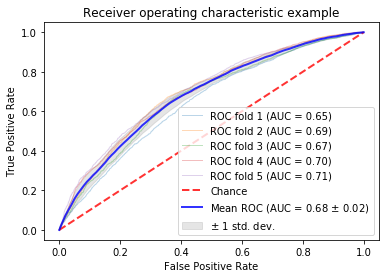

In [59]:
print(__doc__)

from datetime import datetime 
import sys

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
'''
Trainining set과 Validation set의 차이가 77일이고 Validation set의 길이가 15일인 Time Series Cross Validation을 수행합니다.

각 Fold의 전체 Validation Set으로 예측한 뒤, Validation Set의 결항 데이터를 제거하여 평가합니다.
'''

# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
cv = BigconTimeSeriesSplit(n_splits=5)
n_samples, n_features = X.shape


# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves
def train_clf(model_name):
    
    if model_name == "randomforest" or model_name == "rf" or model_name == "RandomForest":
        clf = RandomForestClassifier(n_estimators=500, max_depth = 10, random_state=random_state, n_jobs = -1)
    
    if model_name == "SVM" or model_name == "svm":
        clf = SVC()
        
    if mode_name == "logistic" or model_name == "LogisticRegression":
        clf = LogisticRegression()
    
    print("모델을 훈련합니다.")
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    
    for fold_num, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
        # Fold의 피팅 시작시간 
        start_time = datetime.now()
        
        X_train, y_train = X.iloc[train_idx, :], y[train_idx]
        X_val, y_val = X.iloc[val_idx, :], y[val_idx]
        
        # SMOTE
        sm = SMOTE()
        X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
        # 훈련
        probas_ = pd.DataFrame({'idx_val': val, 'prob': clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]})               
        
        # 종속변수의 결항데이터 제거 
        val_idx = list(np.setdiff1d(val_idx, idx_cancel))
        probas_ = probas_[probas_.isin(val_idx)['idx_val']]
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[val_idx], probas_.iloc[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (fold_num, roc_auc))
        
        # Fold의 피팅 소요시간 
        time_elapsed = datetime.now() - start_time
        print('{0} Fold fitting time (hh:mm:ss.ms) {1}'.format(fold_num, time_elapsed))
        

        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def main():
    model_name = input("원하는 모델을 입력하세요.")
    train_clf(model_name)
    
if __name__ == "__main__":
    main()

In [15]:
import pandas as pd

df_afsnt_total = pd.read_csv("df_afsnt_total.csv", encoding = "cp949")

#### 훈련데이터에 결항데이터를 넣고 결항은 지연이라고 가정.

In [16]:
temp = pd.read_csv("df_afsnt_우헌.csv", encoding = "utf8")
temp = temp[temp['is_cancel'] == True]
df_afsnt_total = pd.concat([df_afsnt_total, temp])

C:\Users\quasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_afsnt_total = df_afsnt_total.sort_values(['year', 'month', 'day'], ascending=[True, True, True])
df_afsnt_total = df_afsnt_total.reset_index()
df_afsnt_total.drop('index', axis = 1, inplace = True)

In [18]:
df_afsnt_total['air_sequence'] = df_afsnt_total['air_sequence'].fillna(-8282)
df_afsnt_total['congestion'] = df_afsnt_total['congestion'].fillna(-8282)
df_afsnt_total['degree_center'] = df_afsnt_total['degree_center'].fillna(0)
df_afsnt_total['degree_center2'] = df_afsnt_total['degree_center2'].fillna(0)
df_afsnt_total['link'] = df_afsnt_total['link'].fillna(-8282)

In [19]:
df_afsnt_total['is_cancel'] = np.where(df_afsnt_total['is_cancel'] == "N", False, True)
df_afsnt_total['is_delay'] = np.where(df_afsnt_total['is_cancel'] == True, True, \
                                      np.where(df_afsnt_total['is_delay'] == "Y", True, False))

In [14]:
print("모델을 훈련합니다.")
import lightgbm as lgb
from datetime import datetime 

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
'''
Trainining set과 Validation set의 차이가 77일이고 Validation set의 길이가 15일인 Time Series Cross Validation을 수행합니다.

각 Fold의 전체 Validation Set으로 예측한 뒤, Validation Set의 결항 데이터를 제거하여 평가합니다.
'''
# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
cv = BigconTimeSeriesSplit(n_splits=5)

# 결항데이터 제거용
y_cancel = df_afsnt_total['is_cancel']
idx_cancel = y_cancel[y_cancel == True].index

df_afsnt_total.drop(['month','day','flight','origin','dest','cause_cancel','time','tailnum','cause_delay','sched_time','real_time',
        'is_cancel', 'date','sched_datetime','real_datetime','delay'], axis=1, inplace=True)

# 요일
encoded = pd.get_dummies(df_afsnt_total.wday)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('wday', axis = 1, inplace = True)

# 항공사
encoded = pd.get_dummies(df_afsnt_total.airline)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('airline', axis = 1, inplace = True)

# origin_dest
encoded = pd.get_dummies(df_afsnt_total.origin_dest)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('origin_dest', axis = 1, inplace = True)

# is_arrive
encoded = pd.get_dummies(df_afsnt_total.is_arrive)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_arrive', axis = 1, inplace = True)

# is_regular
encoded = pd.get_dummies(df_afsnt_total.is_regular)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_regular', axis = 1, inplace = True)



clf = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.05, objective='binary',
                         random_state=8282, silent=True, metric='None', 
                         n_jobs= -1, n_estimators=500, class_weight='balanced',colsample_bytree = 0.9,
 min_child_samples = 68,
 num_leaves = 100,
 ubsample = 0.9)

y = df_afsnt_total['is_delay']
X = df_afsnt_total.loc[:, df_afsnt_total.columns != 'is_delay']

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for fold_num, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
        # Fold의 피팅 시작시간 
        start_time = datetime.now()
        
        X_train, y_train = X.iloc[train_idx, :], y.loc[train_idx]
        X_val, y_val = X.iloc[val_idx, :], y.loc[val_idx]
        
        # SMOTE
        sm = SMOTE()
        x_train, y_train = sm.fit_sample(X_train, y_train)
        # 훈련
        probas_ = pd.DataFrame({'idx_val': val, 'prob': clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]})               
        
        # 종속변수의 결항데이터 제거 
        val_idx = list(np.setdiff1d(val_idx, idx_cancel))
        probas_ = probas_[probas_.isin(val_idx)['idx_val']]
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.loc[val_idx], probas_.iloc[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (fold_num, roc_auc))
        
        # Fold의 피팅 소요시간 
        time_elapsed = datetime.now() - start_time
        print('{0} Fold fitting time (hh:mm:ss.ms) {1}'.format(fold_num, time_elapsed))


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

모델을 훈련합니다.


C:\Users\quasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\quasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\quasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\quasa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

NameError: name 'val' is not defined

### 결항데이터 제거 & SMOTE

In [43]:
import pandas as pd

df_afsnt_total = pd.read_csv("df_afsnt_total.csv", encoding = "cp949")
df_afsnt_total = df_afsnt_total.sort_values(['year', 'month', 'day'], ascending=[True, True, True])
df_afsnt_total = df_afsnt_total.reset_index()
df_afsnt_total.drop('index', axis = 1, inplace = True)
df_afsnt_total['is_delay'] = np.where(df_afsnt_total['is_delay'] == "Y", True, False)


Trainining set과 Validation set의 차이가 77일이고 Validation set의 길이가 15일인 Time Series Cross Validation을 수행합니다.

각 Fold의 전체 Validation Set으로 예측한 뒤, Validation Set의 결항 데이터를 제거하여 평가합니다.

모델을 훈련합니다.
1 Fold fitting time (hh:mm:ss.ms) 0:00:10.587448
2 Fold fitting time (hh:mm:ss.ms) 0:00:21.760122
3 Fold fitting time (hh:mm:ss.ms) 0:00:34.281193
4 Fold fitting time (hh:mm:ss.ms) 0:00:46.488122
5 Fold fitting time (hh:mm:ss.ms) 0:00:59.513423


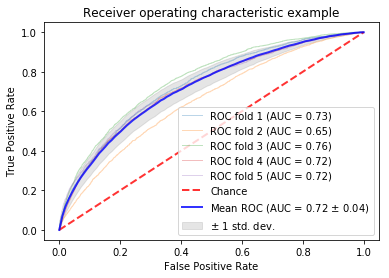

In [44]:
print(__doc__)
import lightgbm as lgb
from datetime import datetime 

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
'''
Trainining set과 Validation set의 차이가 77일이고 Validation set의 길이가 15일인 Time Series Cross Validation을 수행합니다.

각 Fold의 전체 Validation Set으로 예측한 뒤, Validation Set의 결항 데이터를 제거하여 평가합니다.
'''
# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
bts_cv = BigconTimeSeriesSplit(n_splits=5)

# 결항데이터 제거용
# y_cancel = pd.Series(np.where(df_afsnt_total['is_cancel'] == "Y", True, False))
# idx_cancel = y_cancel[y_cancel == True].index

df_afsnt_total.drop(['month','day','flight','origin','dest','cause_cancel','time','tailnum','cause_delay','sched_time','real_time',
        'is_cancel', 'date','sched_datetime','real_datetime','delay'], axis=1, inplace=True)

# 요일
encoded = pd.get_dummies(df_afsnt_total.wday)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('wday', axis = 1, inplace = True)

# 항공사
encoded = pd.get_dummies(df_afsnt_total.airline)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('airline', axis = 1, inplace = True)

# origin_dest
encoded = pd.get_dummies(df_afsnt_total.origin_dest)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('origin_dest', axis = 1, inplace = True)

# is_arrive
encoded = pd.get_dummies(df_afsnt_total.is_arrive)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_arrive', axis = 1, inplace = True)

# is_regular
encoded = pd.get_dummies(df_afsnt_total.is_regular)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_regular', axis = 1, inplace = True)



clf = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.05, objective='binary',
                         random_state=8282, silent=True, metric='None', 
                         n_estimators=500, class_weight='balanced',colsample_bytree = 0.9,
 min_child_samples = 68,
 num_leaves = 100,
 ubsample = 0.9)

y = df_afsnt_total['is_delay'] 
X = df_afsnt_total.loc[:, df_afsnt_total.columns != 'is_delay']

print("모델을 훈련합니다.")
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for fold_num, (train_idx, val_idx) in enumerate(bts_cv.split(X, y), 1):
        # Fold의 피팅 시작시간 
        start_time = datetime.now()
        
        X_train, y_train = X.iloc[train_idx, :], y.loc[train_idx]
        X_val, y_val = X.iloc[val_idx, :], y.loc[val_idx]
        
        # 훈련
        probas_ = pd.DataFrame({'idx_val': val_idx, 'prob': clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]})               
        
#         # 종속변수의 결항데이터 제거 
#         val_idx = list(np.setdiff1d(val_idx, idx_cancel))
#         probas_ = probas_[probas_.isin(val_idx)['idx_val']]
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[val_idx], probas_.iloc[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (fold_num, roc_auc))
        
        # Fold의 피팅 소요시간 
        time_elapsed = datetime.now() - start_time
        print('{0} Fold fitting time (hh:mm:ss.ms) {1}'.format(fold_num, time_elapsed))


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

모델을 훈련합니다.
1 Fold fitting time (hh:mm:ss.ms) 0:00:05.651883
2 Fold fitting time (hh:mm:ss.ms) 0:00:11.971978
3 Fold fitting time (hh:mm:ss.ms) 0:00:20.121183
4 Fold fitting time (hh:mm:ss.ms) 0:00:28.977376
5 Fold fitting time (hh:mm:ss.ms) 0:00:36.780673


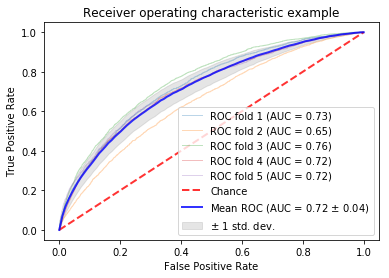

In [146]:
import pandas as pd

df_afsnt_total = pd.read_csv("df_afsnt_total.csv", encoding = "cp949")
df_afsnt_total = df_afsnt_total.sort_values(['year', 'month', 'day'], ascending=[True, True, True])
df_afsnt_total = df_afsnt_total.reset_index()
df_afsnt_total.drop('index', axis = 1, inplace = True)

In [147]:
df_afsnt_total["is_arrive"] = np.where(df_afsnt_total["is_arrive"] == "A", "Y", "N")
df_afsnt_total[['is_regular', 'is_delay']] = df_afsnt_total[['is_regular', 'is_delay']].apply(lambda x: x == "Y") # is_가 많아졌을 때 효과적인 코딩임

In [5]:
print("모델을 훈련합니다.")
import catboost as cb
from datetime import datetime 

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
cv = BigconTimeSeriesSplit(n_splits=5)

# 결항데이터 제거용
y_cancel = pd.Series(np.where(df_afsnt_total['is_cancel'] == "Y", True, False))
idx_cancel = y_cancel[y_cancel == True].index

df_afsnt_total.drop(['month','day','flight','origin','dest','cause_cancel','time','tailnum','cause_delay','sched_time','real_time',
        'is_cancel', 'date','sched_datetime','real_datetime','delay'], axis=1, inplace=True)


cat_features_index = [1, 2, 3, 4, 18]
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500,
                            l2_leaf_reg= 9, learning_rate= 0.15, random_state = 8282, logging_level='Silent')

y = np.where(df_afsnt_total['is_delay'] == True, 1, 0)
X = df_afsnt_total.loc[:, df_afsnt_total.columns != 'is_delay']

모델을 훈련합니다.


NameError: name 'df_afsnt_total' is not defined

모델을 훈련합니다.
1 Fold fitting time (hh:mm:ss.ms) 0:01:43.084211
2 Fold fitting time (hh:mm:ss.ms) 0:04:09.549173
3 Fold fitting time (hh:mm:ss.ms) 0:07:31.370098
4 Fold fitting time (hh:mm:ss.ms) 0:11:57.890802
5 Fold fitting time (hh:mm:ss.ms) 0:15:36.281547


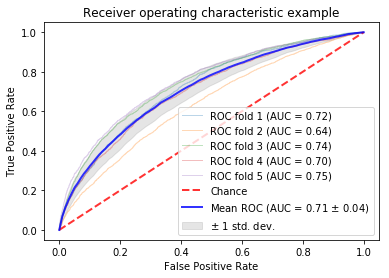

In [148]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, val in cv.split(X, y):
    # Fold의 피팅 시작시간 
    start_time = datetime.now() 

    # 훈련
    probas_ = pd.DataFrame({'idx_val': val, 'prob': clf.fit(X.iloc[train, ], y[train], cat_features= cat_features_index).predict_proba(X.iloc[val, ])[:, 1]})               

    # 종속변수의 결항데이터 제거 
    val = list(np.setdiff1d(val, idx_cancel))
    probas_ = probas_[probas_.isin(val)['idx_val']]
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[val], probas_.iloc[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i + 1, roc_auc))

    # Fold의 피팅 소요시간 
    time_elapsed = datetime.now() - start_time
    print('{0} Fold fitting time (hh:mm:ss.ms) {1}'.format(i + 1, time_elapsed))

    i += 1


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [151]:
pd.DataFrame({'name': clf.feature_names_, 'importance': clf.feature_importances_})

,name,importance
0,year,7.637521
1,wday,4.230906
2,airline,11.739605
3,is_arrive,7.246040
4,is_regular,0.465690
5,congestion,5.497769
6,link,8.499595
7,air_sequence,7.401713
8,degree_center,0.923659
9,degree_center2,0.513832


In [149]:
import shap  # package used to calculate Shap values

# load JS visualization code to notebook
shap.initjs()
# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X.iloc[val, ])

# explain the model's predictions using SHAP values
shap.summary_plot(shap_values, X.iloc[val, ], show = False)

KeyError: 'float_feature_index'

### Logistic Regression

In [165]:
import pandas as pd

df_afsnt_total = pd.read_csv("df_afsnt_total.csv", encoding = "cp949")
df_afsnt_total = df_afsnt_total.sort_values(['year', 'month', 'day'], ascending=[True, True, True])
df_afsnt_total = df_afsnt_total.reset_index()
df_afsnt_total.drop('index', axis = 1, inplace = True)

In [172]:
str(0)

'0'

In [176]:
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
cv = BigconTimeSeriesSplit(n_splits=5)

i = 1
train_val_idx = {'fold1': 
                 {'train': 0, 'val': 0}, 
                 'fold2': 
                  {'train': 0, 'val': 0}, 
                 'fold3':
                  {'train': 0, 'val': 0}, 
                 'fold4':
                  {'train': 0, 'val': 0}, 
                 'fold5':
                 {'train': 0, 'val': 0}}
for train, val in cv.split(X, y):
    i = str(i)
    train_val_idx['fold' + i]['train'] = train
    train_val_idx['fold' + i]['val'] = val
    i = int(i)
    i += 1
    
train_val_idx

{'fold1': {'train': array([    0,     1,     2, ..., 99282, 99283, 99284]),
  'val': array([180135, 180136, 180137, ..., 195882, 195883, 195884])},
 'fold2': {'train': array([     0,      1,      2, ..., 295167, 295168, 295169]),
  'val': array([376020, 376021, 376022, ..., 391767, 391768, 391769])},
 'fold3': {'train': array([     0,      1,      2, ..., 491052, 491053, 491054]),
  'val': array([571905, 571906, 571907, ..., 587652, 587653, 587654])},
 'fold4': {'train': array([     0,      1,      2, ..., 686937, 686938, 686939]),
  'val': array([767790, 767791, 767792, ..., 783537, 783538, 783539])},
 'fold5': {'train': array([     0,      1,      2, ..., 882822, 882823, 882824]),
  'val': array([963675, 963676, 963677, ..., 979422, 979423, 979424])}}

모델을 훈련합니다.


C:\Users\quasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 Fold fitting time (hh:mm:ss.ms) 0:00:06.132547


C:\Users\quasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2 Fold fitting time (hh:mm:ss.ms) 0:00:16.055107


C:\Users\quasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 Fold fitting time (hh:mm:ss.ms) 0:00:26.636038


C:\Users\quasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 Fold fitting time (hh:mm:ss.ms) 0:00:37.138553


C:\Users\quasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 Fold fitting time (hh:mm:ss.ms) 0:00:53.681918


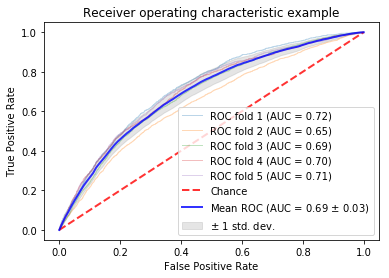

In [166]:
print("모델을 훈련합니다.")
from sklearn.linear_model import LogisticRegression
from datetime import datetime 

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
cv = BigconTimeSeriesSplit(n_splits=5)

# 결항데이터 제거용
y_cancel = pd.Series(np.where(df_afsnt_total['is_cancel'] == "Y", True, False))
idx_cancel = y_cancel[y_cancel == True].index

df_afsnt_total.drop(['month','day','flight','origin','dest','cause_cancel','time','tailnum','cause_delay','sched_time','real_time',
        'is_cancel', 'date','sched_datetime','real_datetime','delay'], axis=1, inplace=True)

# 요일
encoded = pd.get_dummies(df_afsnt_total.wday)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('wday', axis = 1, inplace = True)

# 항공사
encoded = pd.get_dummies(df_afsnt_total.airline)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('airline', axis = 1, inplace = True)

# origin_dest
encoded = pd.get_dummies(df_afsnt_total.origin_dest)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('origin_dest', axis = 1, inplace = True)

# is_arrive
encoded = pd.get_dummies(df_afsnt_total.is_arrive)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_arrive', axis = 1, inplace = True)

# is_regular
encoded = pd.get_dummies(df_afsnt_total.is_regular)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_regular', axis = 1, inplace = True)

clf = LogisticRegression(C = 100, random_state = 8282)

y = np.where(df_afsnt_total['is_delay'] == "Y", True, False)
X = df_afsnt_total.loc[:, df_afsnt_total.columns != 'is_delay']

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, val in cv.split(X, y):
    # Fold의 피팅 시작시간 
    start_time = datetime.now() 

    # 훈련
    probas_ = pd.DataFrame({'idx_val': val, 'prob': clf.fit(X.iloc[train, ], y[train]).predict_proba(X.iloc[val, ])[:, 1]})               

    # 종속변수의 결항데이터 제거 
    val = list(np.setdiff1d(val, idx_cancel))
    probas_ = probas_[probas_.isin(val)['idx_val']]
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[val], probas_.iloc[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i + 1, roc_auc))

    # Fold의 피팅 소요시간 
    time_elapsed = datetime.now() - start_time
    print('{0} Fold fitting time (hh:mm:ss.ms) {1}'.format(i + 1, time_elapsed))

    i += 1


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### SVM

In [ ]:
print("모델을 훈련합니다.")
from sklearn.linear_model import LogisticRegression
from datetime import datetime 

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
# CV Class
class BigconTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
        
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        
        # fold마다 margin을 달리 잡는다.
        margin = 1050*77
        start = 0
        stop = 0 
        for i in range(self.n_splits):
            stop = (i + 1) *  k_fold_size
            mid = stop - 1050*15
            yield indices[start:mid - margin], indices[mid: stop]
            
random_state = 8282
cv = BigconTimeSeriesSplit(n_splits=5)

# 결항데이터 제거용
y_cancel = pd.Series(np.where(df_afsnt_total['is_cancel'] == "Y", True, False))
idx_cancel = y_cancel[y_cancel == True].index

df_afsnt_total.drop(['month','day','flight','origin','dest','cause_cancel','time','tailnum','cause_delay','sched_time','real_time',
        'is_cancel', 'date','sched_datetime','real_datetime','delay'], axis=1, inplace=True)

# 요일
encoded = pd.get_dummies(df_afsnt_total.wday)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('wday', axis = 1, inplace = True)

# 항공사
encoded = pd.get_dummies(df_afsnt_total.airline)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('airline', axis = 1, inplace = True)

# origin_dest
encoded = pd.get_dummies(df_afsnt_total.origin_dest)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('origin_dest', axis = 1, inplace = True)

# is_arrive
encoded = pd.get_dummies(df_afsnt_total.is_arrive)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_arrive', axis = 1, inplace = True)

# is_regular
encoded = pd.get_dummies(df_afsnt_total.is_regular)
df_afsnt_total = pd.concat([df_afsnt_total, encoded], axis=1)
df_afsnt_total.drop('is_regular', axis = 1, inplace = True)

clf = LogisticRegression(C = 100, random_state = 8282)

y = np.where(df_afsnt_total['is_delay'] == "Y", True, False)
X = df_afsnt_total.loc[:, df_afsnt_total.columns != 'is_delay']

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, val in cv.split(X, y):
    # Fold의 피팅 시작시간 
    start_time = datetime.now() 

    # 훈련
    probas_ = pd.DataFrame({'idx_val': val, 'prob': clf.fit(X.iloc[train, ], y[train]).predict_proba(X.iloc[val, ])[:, 1]})               

    # 종속변수의 결항데이터 제거 
    val = list(np.setdiff1d(val, idx_cancel))
    probas_ = probas_[probas_.isin(val)['idx_val']]
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[val], probas_.iloc[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i + 1, roc_auc))

    # Fold의 피팅 소요시간 
    time_elapsed = datetime.now() - start_time
    print('{0} Fold fitting time (hh:mm:ss.ms) {1}'.format(i + 1, time_elapsed))

    i += 1


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [49]:
scores = cross_val_score(pipe, X, y, cv = tscv, scoring='roc_auc')
print("AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

AUC: 0.70 (+/- 0.03)


In [52]:
np.sum(df_afsnt["is_delay"])

118937

In [51]:
df_afsnt["is_delay"] = np.where(df_afsnt["is_cancel"] == True, False, df_afsnt["is_delay"])

C:\Users\quasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
# df_afsnt["is_delay"] = np.where(df_afsnt["is_cancel"] == True, True, df_afsnt["is_delay"])

C:\Users\quasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rom sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score , ShuffleSplit
from sklearn import metrics
from sklearn.metrics import roc_curve , roc_auc_score , f1_score , classification_report
## plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

##Model classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier 


def rocvis(true , prob , label ) :
    AUC = np.mean(true == np.round(prob.ravel()).astype(int))
    if type(true[0]) == str :
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        true = le.fit_transform(true)
    else :
        pass
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label =  "AUC : {:.2f} , {}".format(AUC,label)   )
    
    
scale_features = [연속형 변수들]

tscv = TimeSeriesSplit(n_splits=5)
scores = ['AUC', 'accuracy']   

import warnings
warnings.filterwarnings("ignore")
from pycm import * 

cv = TimeSeriesSplit(n_splits=5 , test_size=0.3, random_state=8282)

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=8282))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=8282))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=8282, probability = True))])

pipe_lda = Pipeline([('scl', StandardScaler()),
                     ('clf', LDA(n_components = 2))])

pipe_qda = Pipeline([('scl', StandardScaler()),
                     ('clf', QDA())])

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNN())])

pipe_ridge = Pipeline([('scl', StandardScaler()),
                     ('clf', RidgeClassifier())])


aram_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
depth_range = [7, 8, 9, 10]
min_samples_split_range = [0.5, 0.7 , 0.9]
param_range = [0.5, 0.1]
param_range_fl = np.logspace(0,-5,5)

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': depth_range,
                   'clf__min_samples_split': min_samples_split_range }]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

grid_params_lda = [{"clf__tol" : param_range_fl , 
                    "clf__solver" : ["svd","lsqr","eigen"]} ]

grid_params_qda = [{"clf__tol" : param_range_fl} ]


grid_params_knn = [{"clf__n_neighbors" : [2,4,6] , 
                    "clf__weights" : ["uniform","distance"] , 
                    'clf__algorithm': ["ball_tree", "kd_tree", "brute"],
                   } ]

grid_params_ridge = [
    {"clf__solver" : ["svd","cholesky","lsqr","sparse_cg" , "sag","saga"] ,
     "clf__tol" : param_range_fl , 
     "clf__alpha" : param_range_fl , 
    }
]


pipe = [
    pipe_lr , pipe_rf , pipe_svm , 
    pipe_lda , pipe_qda , pipe_gbm , 
    pipe_knn , pipe_ridge
       ]
params = [
    grid_params_lr , grid_params_rf , grid_params_svm , 
    grid_params_lda , grid_params_qda, grid_params_gbm , 
    grid_params_knn , grid_params_ridge , 
]

jobs = 20

grid_dict = {0: 'Logistic Regression', 
             1: 'Random Forest', 
             2: 'Support Vector Machine' ,
             3: "Linear Discriminant Analysis",
             4: "Quadratic Discriminant Analysis",
             5: "KNNClassifier" , 
             6: "RidgeClassifier" , 
            }

model_prob = {}
model_result = {}
model_best_params = {}
model_confusion = {}
plt.style.use('ggplot')
fig , ax = plt.subplots(figsize= (20,10))
plt.plot([0, 1], [0, 1], linestyle='--')


for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, iid=True , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    try :
        y_prob = search.predict_proba(X_test)
    except Exception as e :
        pass
    rocvis(true = y_test , prob = y_prob[:,1] , label = grid_dict.get(idx) )
    model_result[grid_dict.get(idx)] = roc_auc_score(y_test, y_pred)  
    model_prob[grid_dict.get(idx)] = y_prob
    model_best_params[grid_dict.get(idx)] = search.best_params_
    model_confusion[grid_dict.get(idx)] = ConfusionMatrix(y_test, y_pred)
    
plt.legend(fontsize = 20 , loc='center', shadow=True )
plt.title("Models Roc Curve" , fontsize= 25)
plt.savefig("./Model_Result.png")
plt.show()

cp = Compare(model_confusion)

## LightGBM, CatBoost

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

fit_params={"early_stopping_rounds":300, 
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [(X_test, y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': False,
            'categorical_feature': 'auto'}

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.995, current_iter)
    return max(lr, min_learning_rate)

fit_params['callbacks'] = [lgb.reset_parameter(learning_rate=learning_rate_power_0997)]

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(12, 20), 
             'min_child_samples': sp_randint(40, 100), 
             #'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.75, scale=0.25), 
             'colsample_bytree': sp_uniform(loc=0.8, scale=0.15)#,
             #'reg_alpha': [0, 1e-3, 1e-1, 1, 10, 50, 100],
             #'reg_lambda': [0, 1e-3, 1e-1, 1, 10, 50, 100]
            }

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.05, objective='multiclass',
                         random_state=314, silent=True, metric='None', 
                         n_jobs= -1, n_estimators=500, class_weight='balanced')

tscv = TimeSeriesSplit(n_splits = 5)

gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring=['f1_macro', 'accuracy'],
    cv= tscv,
    refit='f1_macro',
    random_state=314, 
    verbose=True)

_ = gs.fit(X_train, y_train, **fit_params)

print("PERFORMANCE IMPROVES FROM TOP TO BOTTOM")
print("Valid+-Std     Train  :   Parameters")
for i in np.argsort(gs.cv_results_['mean_test_f1_macro'])[-5:]:
    print('{1:.3f}+-{3:.3f}     {2:.3f}   :  {0}'.format(gs.cv_results_['params'][i], 
                                    gs.cv_results_['mean_test_f1_macro'][i], 
                                    gs.cv_results_['mean_train_f1_macro'][i],
                                    gs.cv_results_['std_test_f1_macro'][i]))

opt_parameters = gs.best_params_

means_accuracy = gs.cv_results_['mean_test_accuracy']
stds_accuracy = gs.cv_results_['std_test_accuracy']
for mean, std, params in zip(means_accuracy, stds_accuracy, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

# Fit the final model with learning rate decay
clf_final = lgb.LGBMClassifier(**clf.get_params())
clf_final.set_params(**opt_parameters)

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.997, current_iter)
    return max(lr, min_learning_rate)

#Train the final model with learning rate decay
fit_params['verbose'] = 200
_ = clf_final.fit(X_train, y_train, **fit_params)#, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_power_0997)])

## RNN